# Case Study: Jamboree Education - Linear Regression

# 1.0 Defining the Problem Statement

## 1.1 About the Jamboree
Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.


## 1.2 Problem Statement
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.
- As a data scientist/ML engineer it is our responsibility to explore, clean, analyse and create a model to predict an applicant's likelihood of admission based on the given dataset.
- A Linear Regression model should be created and tested for its performance and reiterated until we arrive at an optimized model.

# 2.0 Importing Libraries and Loading the Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv -O "Jamboree_Admission_Dset.csv"

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv
To: /content/Jamboree_Admission_Dset.csv
100% 16.2k/16.2k [00:00<00:00, 37.3MB/s]


**Sampling the dataset**

In [ ]:
df = pd.read_csv("/content/Jamboree_Admission_Dset.csv")
df.sample(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
258,259,326,102,4,5.0,5.0,8.76,1,0.77
460,461,319,105,4,4.0,4.5,8.66,1,0.77
469,470,326,114,4,4.0,3.5,9.16,1,0.86
163,164,317,105,3,3.5,3.0,8.56,0,0.68
328,329,324,112,4,4.0,3.5,8.77,1,0.80


# 3.0 Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


Insight -
- The datatype of all the columns are appropriate.

Pending Further Action -
- It is imperitive to drop unique row indentifiers (like index, ID's and Serial numbers)when performing Linear Regression as they don't carry meaning information about the relationship between the predictor variable (independent variable) and the target variable.
- Unique identifiers are usually arbitrary and unrelated to the underlying data relationships. Including them as a feature can mislead the model into associating them with the target variable, introducing noise rather than meaningful patterns.

In [ ]:
df.shape

(500, 9)

**Insight-**
- We have 500 samples for analysing, training and testing and 9 non categorical variables.

Pending Further Action -
- Dataset needed to be checked for duplicates which can create bias or improper data distributions.
- Also needed to be checked for null values.
- Unique values of the features.


**Checking for duplicates**

In [ ]:
df.duplicated().sum()


0

**Checking for null values**

In [ ]:
df.isnull().sum().sum()

0

**Accessing the unique values in each column**

In [ ]:
df.nunique()

,0
Serial No.,500
GRE Score,49
TOEFL Score,29
University Rating,5
SOP,9
LOR,9
CGPA,184
Research,2
Chance of Admit,61


In [ ]:
df.columns
for i in df.columns:
  if i == "Serial No.":
    continue
  else:
    print(i)
    print(np.sort(df[i].unique()))
    print()

GRE Score
[290 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309
 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327
 328 329 330 331 332 333 334 335 336 337 338 339 340]

TOEFL Score
[ 92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120]

University Rating
[1 2 3 4 5]

SOP
[1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]

LOR 
[1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]

CGPA
[6.8  7.2  7.21 7.23 7.25 7.28 7.3  7.34 7.36 7.4  7.42 7.43 7.45 7.46
 7.5  7.54 7.56 7.57 7.6  7.64 7.65 7.66 7.67 7.68 7.69 7.7  7.79 7.8
 7.81 7.84 7.86 7.87 7.88 7.89 7.9  7.92 7.94 7.95 7.96 7.97 7.98 8.
 8.01 8.02 8.03 8.04 8.06 8.07 8.09 8.1  8.12 8.13 8.14 8.15 8.16 8.17
 8.18 8.2  8.21 8.22 8.23 8.24 8.25 8.26 8.27 8.28 8.3  8.32 8.33 8.34
 8.35 8.36 8.37 8.4  8.42 8.43 8.44 8.45 8.46 8.47 8.48 8.49 8.5  8.52
 8.53 8.54 8.55 8.56 8.57 8.6  8.62 8.64 8.65 8.66 8.67 8.68 8.69 8.7
 8.71 8.72 8.73 8.74 8.75 8.76 8.77 8.78 

Insight-
- Since all the columns are non categorical, unique values won't give much information.

Pending Further Action-
- Whereas spread of each columns can give us a conclusive information of the students applying which will be analysed further down this case study.


**Comprehensive understanding of the dataset**

In [ ]:
df.describe().T.iloc[1:,:]
# code to remove the first colum added

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


Range of GRE Score column is from 290 to 340

Range of TOEFL Score column is from 92 to 120

Range of University Rating column is from 1 to 5

Range of SOP column is from 1.0 to 5.0

Range of LOR  column is from 1.0 to 5.0

Range of CGPA column is from 6.8 to 9.92

Range of Research column is from 0 to 1

Range of Chance_of_Admit column is from 0.34 to 0.97


## **3.1 Insights**
- There are no duplicate records as duplicate records can create overfitting.
- There are no null values or records in our dataset.
- Since all the columns are non categorical, unique values won't give much information. Whereas spread of each columns can give us a conclusive information of the students applying which will be analysed further down this case study.
- Universities are categorized from 1 to 5, representing an ordinal scale. While they can be treated as either categorical or numerical data, in this case, we consider them numerical because the values indicate a ranked order.
- Same as University Ranking both SOP and LOR are rated from 1 to 5.
- The CGPA has a range of 6.8 and 9.92, based on the dataset it is highly likely that people with CGPA more than 6.8 has an inclination towards IVY league schools.
- Also, the "Chance of Admit" is as low as 0.34, and it is safe to say that Ivy League schools likely prefer candidates with higher chances of admission, typically above a certain threshold, as they tend to have more competitive requirements.


# 4.0 Univariate Analysis

In [ ]:
numerical = ['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA', 'Chance of Admit ']

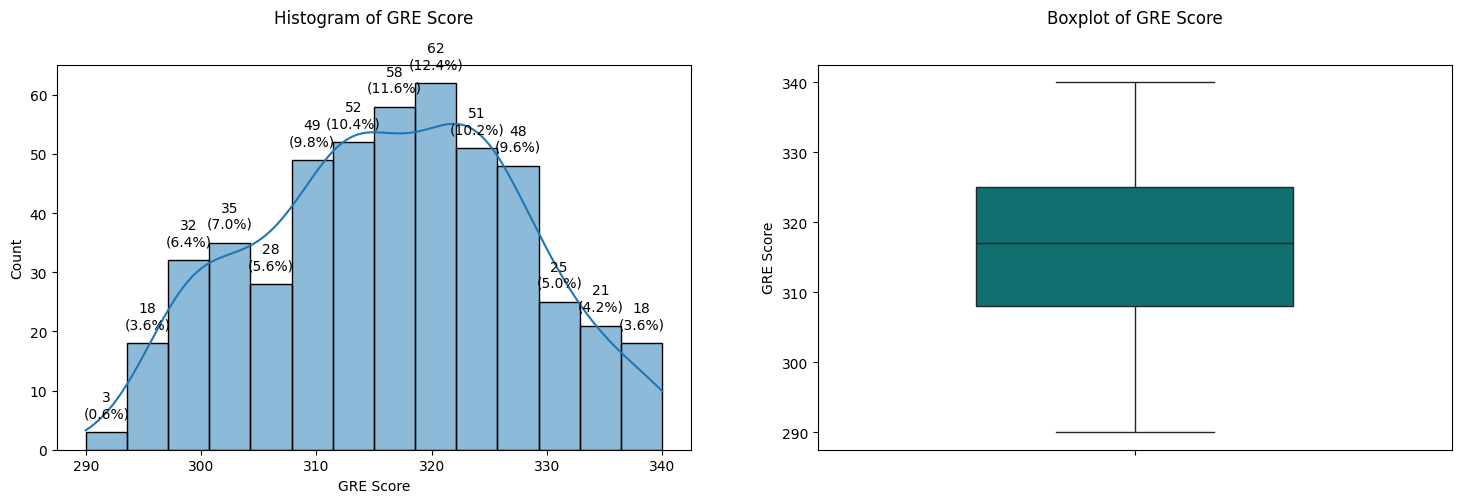

  Statistic       Value
0     count  500.000000
1      mean  316.472000
2       std   11.295148
3       min  290.000000
4       25%  308.000000
5       50%  317.000000
6       75%  325.000000
7       max  340.000000


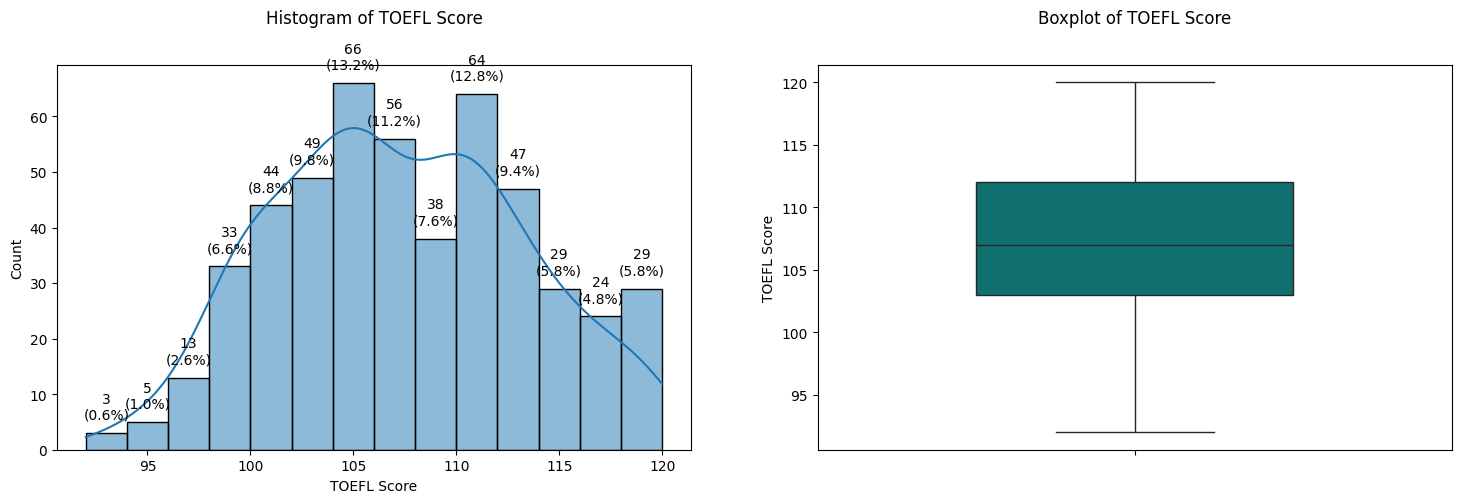

  Statistic       Value
0     count  500.000000
1      mean  107.192000
2       std    6.081868
3       min   92.000000
4       25%  103.000000
5       50%  107.000000
6       75%  112.000000
7       max  120.000000


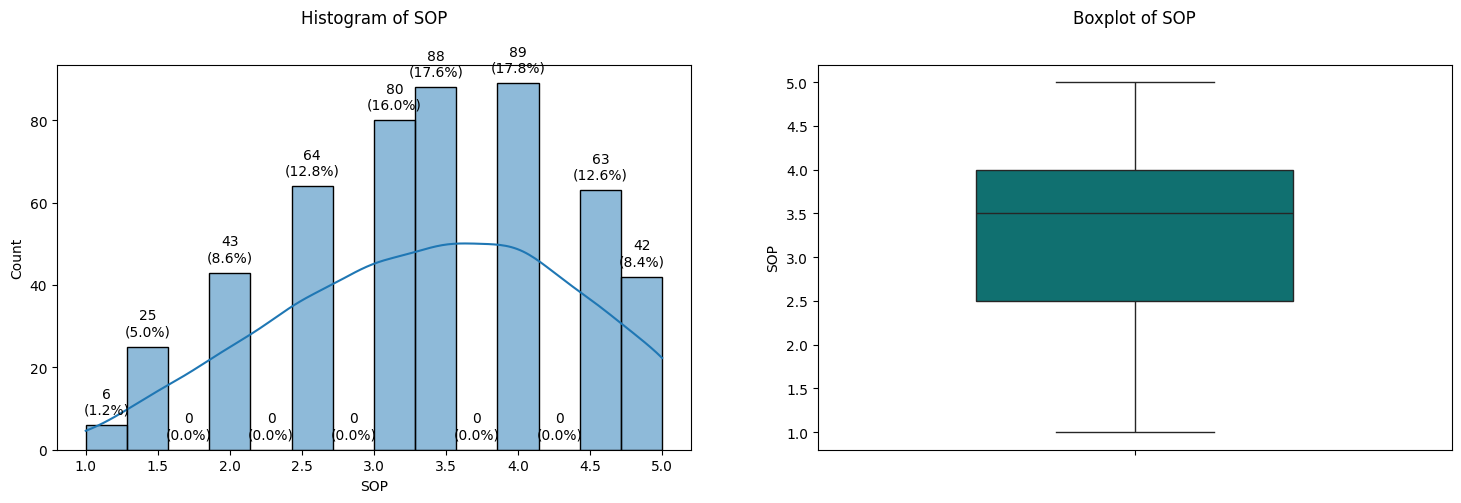

  Statistic       Value
0     count  500.000000
1      mean    3.374000
2       std    0.991004
3       min    1.000000
4       25%    2.500000
5       50%    3.500000
6       75%    4.000000
7       max    5.000000


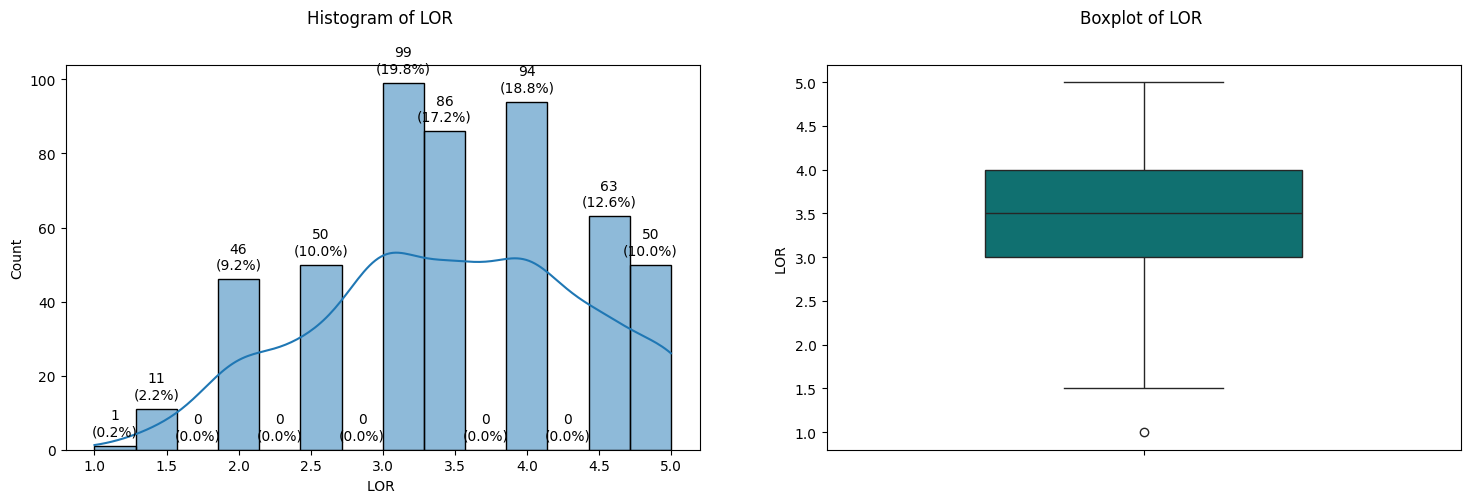

  Statistic      Value
0     count  500.00000
1      mean    3.48400
2       std    0.92545
3       min    1.00000
4       25%    3.00000
5       50%    3.50000
6       75%    4.00000
7       max    5.00000


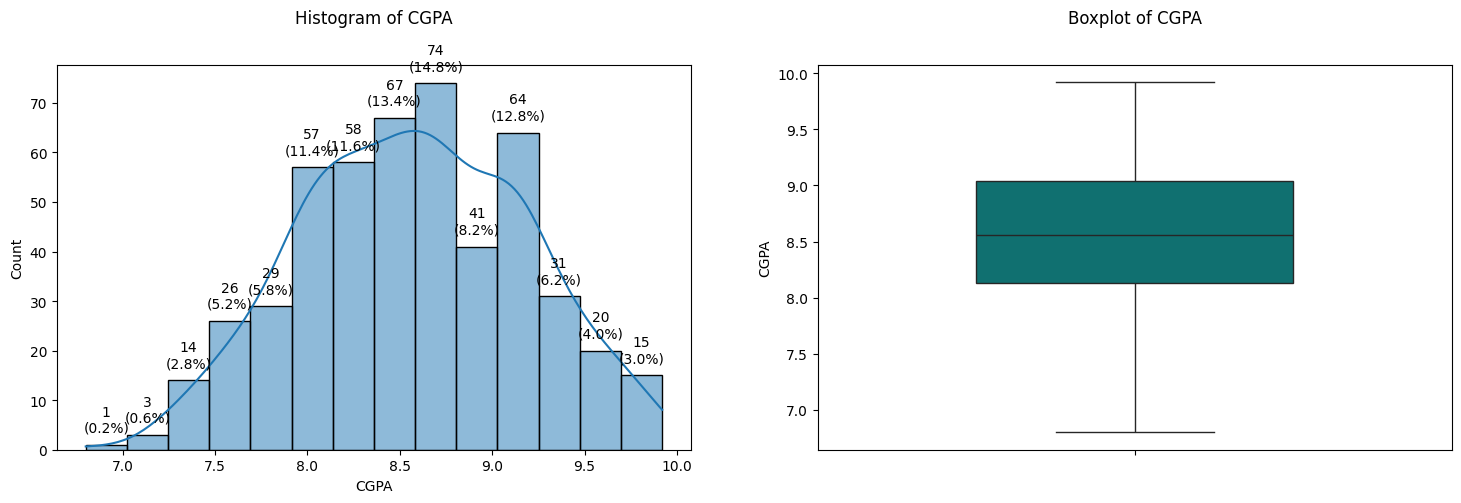

  Statistic       Value
0     count  500.000000
1      mean    8.576440
2       std    0.604813
3       min    6.800000
4       25%    8.127500
5       50%    8.560000
6       75%    9.040000
7       max    9.920000


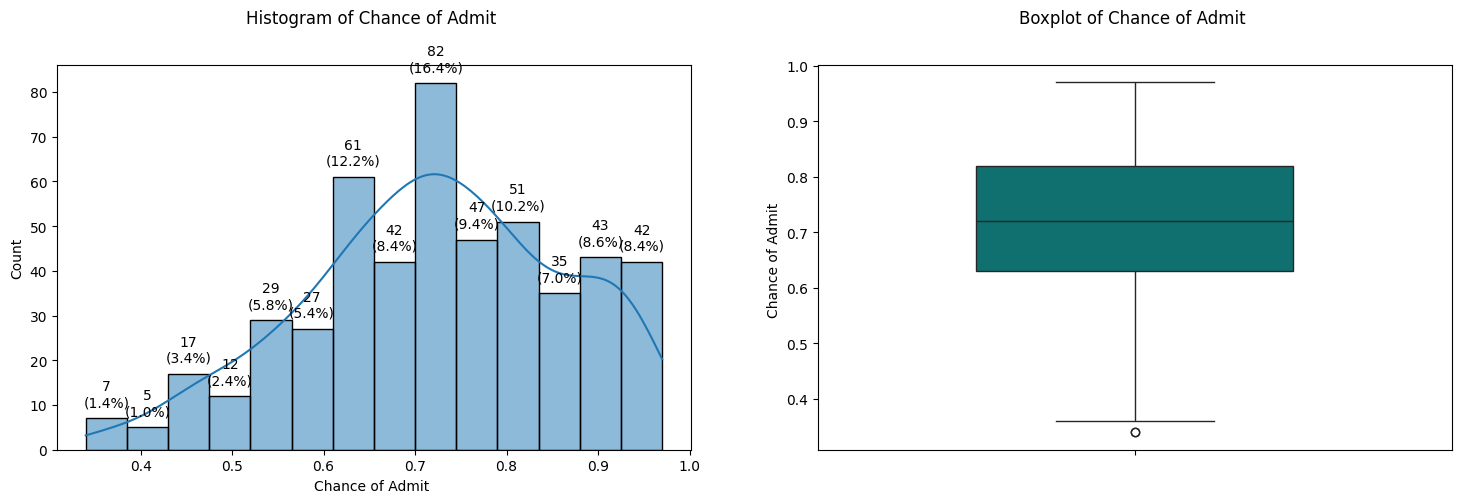

  Statistic      Value
0     count  500.00000
1      mean    0.72174
2       std    0.14114
3       min    0.34000
4       25%    0.63000
5       50%    0.72000
6       75%    0.82000
7       max    0.97000


In [ ]:
for i in numerical:
  fig, axes = plt.subplots(1,2, figsize = (18,5))
  sns.histplot(df[i], bins = 14, kde = True, ax = axes[0])
  axes[0].set_title(f"Histogram of {i}", pad = 30)
  for j in axes[0].patches:
    values = j.get_height()
    percentage = 100 * values / len(df)
    axes[0].annotate(f'{values}\n({percentage:.1f}%)', (j.get_x() + j.get_width()/2, j.get_height()+2), ha='center', va='bottom', fontsize=10)


  sns.boxplot(df[i], ax = axes[1], width = 0.5, color='teal')
  axes[1].set_title(f'Boxplot of {i}', pad = 30)
  plt.show()

  tab_col = pd.DataFrame(df[i].describe()).reset_index()
  tab_col.columns = ['Statistic', 'Value']
  print(tab_col)


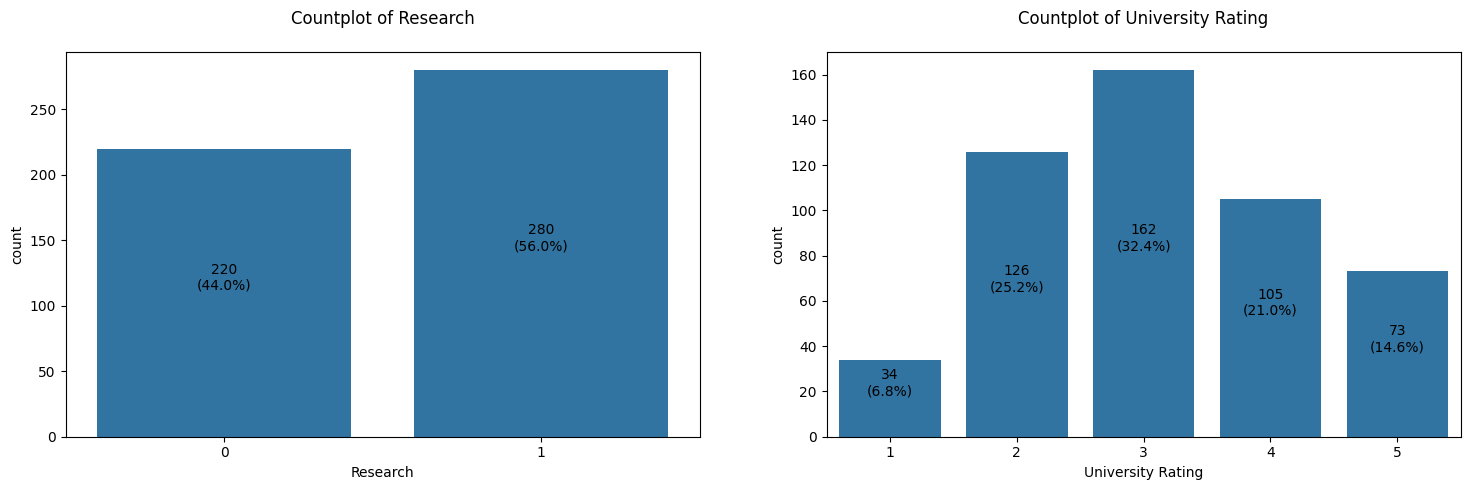

In [ ]:
# for i in categorical:
#   fig, axes = plt.subplots(1,2, figsize = (18,5))
#   sns.countplot(df[i], ax = axes[0])
#   axes[0].set_title(f"Countplot of {i}")

# categorical = ['Research', 'University Rating']
fig, axes = plt.subplots(1,2, figsize=(18,5))

sns.countplot(data = df, x = 'Research', ax = axes[0])
axes[0].set_title(f"Countplot of Research", pad = 20)
# Adding counts or percentages
for i in axes[0].patches:
    value = int(i.get_height())  # Count
    percentage = 100 * value / len(df)  # Percentage
    axes[0].annotate(f'{value}\n({percentage:.1f}%)',
                     (i.get_x() + i.get_width()/2, i.get_height()/2),
                     ha='center', va='bottom', fontsize=10)

sns.countplot(data = df, x = 'University Rating', ax = axes[1])
axes[1].set_title(f"Countplot of University Rating", pad = 20)
# Adding counts or percentages
for i in axes[1].patches:
    value = int(i.get_height())  # Count
    percentage = 100 * value / len(df)  # Percentage
    axes[1].annotate(f'{value}\n({percentage:.1f}%)',
                     (i.get_x() + i.get_width() / 2, i.get_height()/2),
                     ha='center', va='bottom', fontsize=10)

plt.show()


## **4.1 Insights**
*Understanding Data Distribution:*
- Provides insights into the overall distribution of each independent variable, helping identify patterns, trends, or anomalies.
- For example, analyzing "GRE Scores" distribution highlights the typical range of scores and any potential outliers.

*Estimating Central Tendency:*
- Measures such as mean, median, and mode help understand the typical value for a variable (e.g., average "University Rating").
- Central tendencies give a benchmark for comparisons and decision-making.

*Assessing Variability:*
- Variability metrics like standard deviation and range help assess how spread out the data is.
- For instance, knowing the variability in "CGPA" can guide whether adjustments are needed for more uniform selection criteria.

*Detecting Outliers:*
- Helps identify extreme or unusual data points that might distort analysis or affect predictions.
- For example, extreme values in "Chance of Admit" might need to be treated or investigated further.

*Improved Feature Selection:*
- Highlights variables with potential influence on the target variable by analyzing distribution and variability.
- For instance, variables with minimal variation (e.g., constant values) might not contribute meaningfully to the model.

*Business Implication:*
- By understanding the independent variables, we can tailor recommendations for students (e.g., focusing on improving weaker areas like SOP or LOR scores).
- Helps Ivy League or other institutions set clear benchmarks for admissions criteria.

# 5.0 Bivariate and Multivariate Analysis

## 5.1 Analysis of independent features against the Target variables

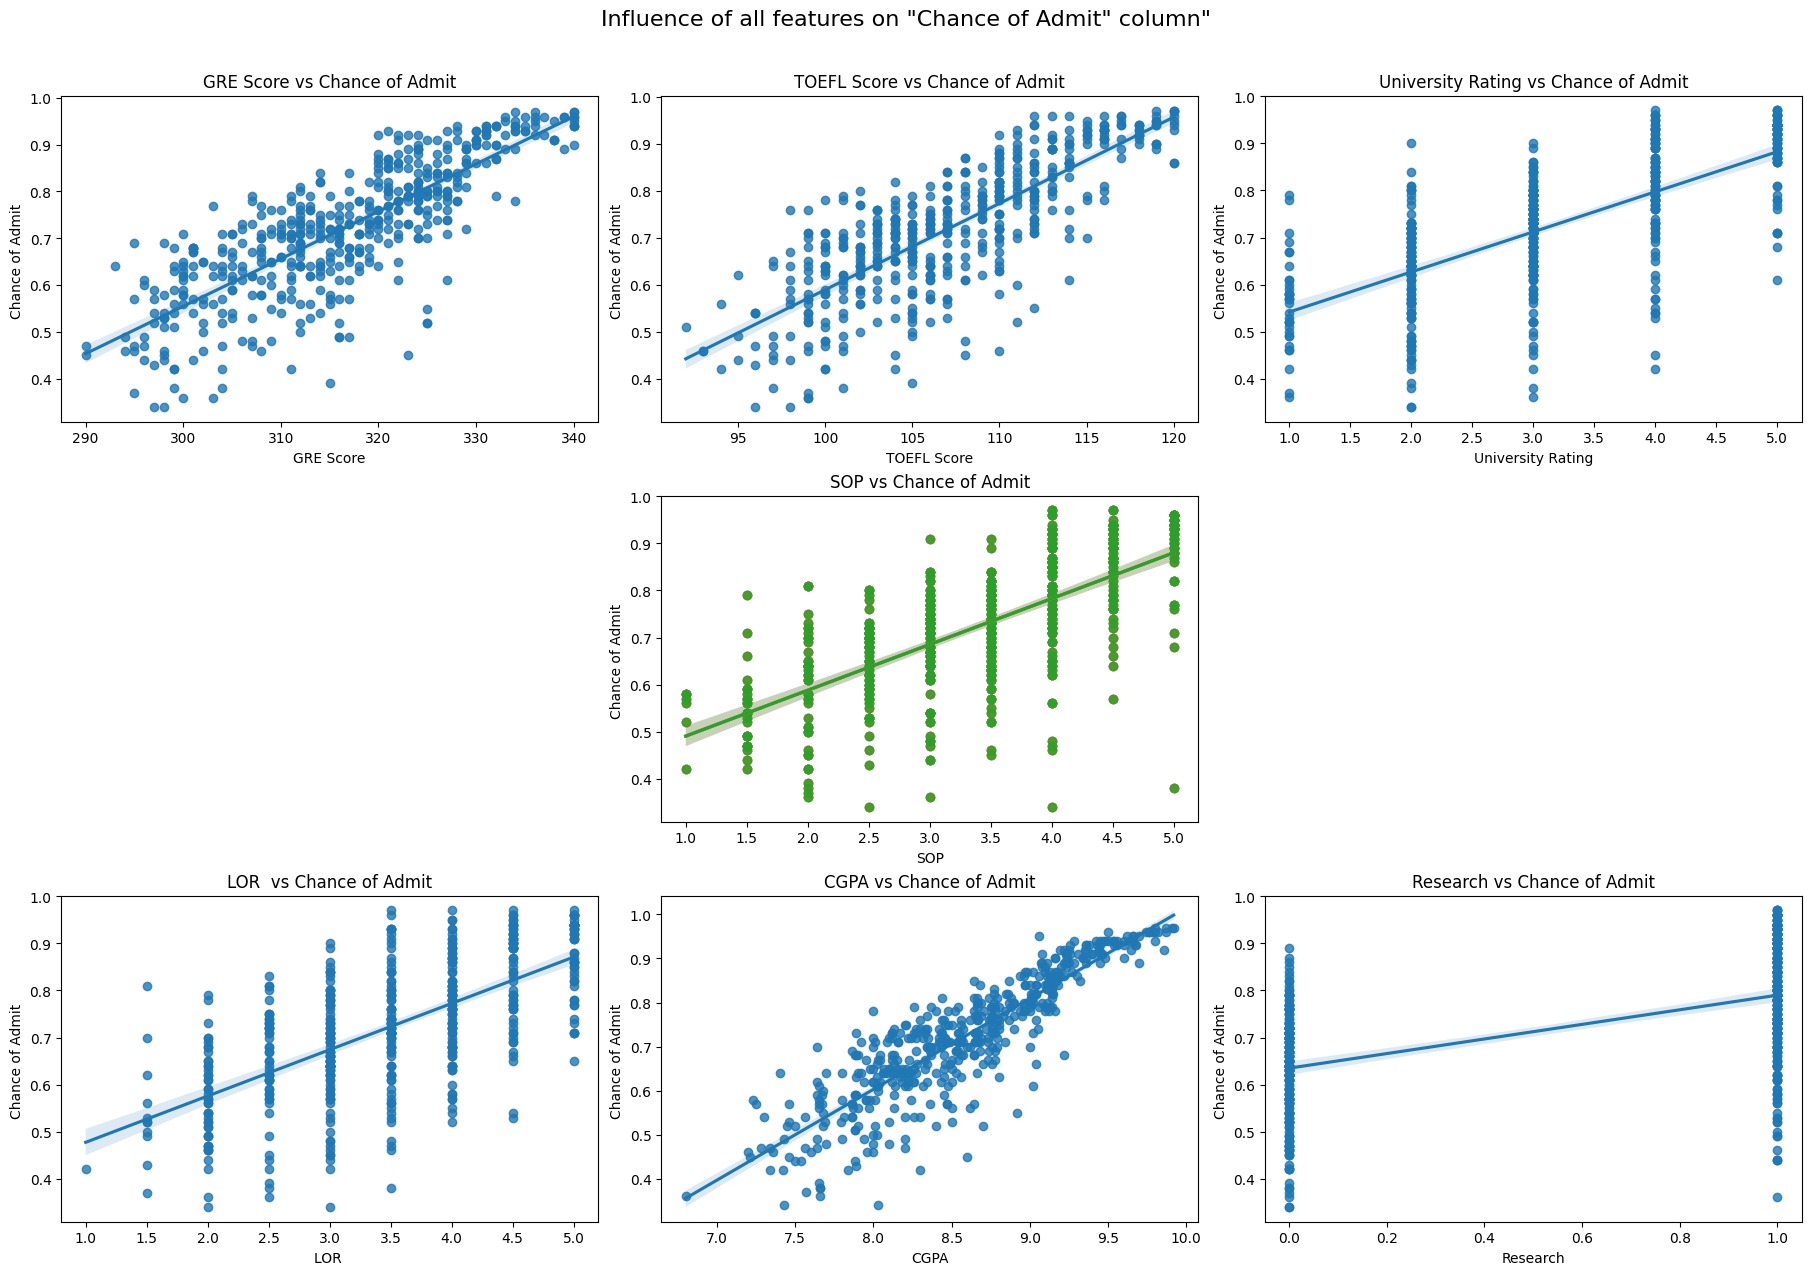

In [ ]:
bivariate = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']

# Create Subplots: 3 rows, 3 columns
fig, axes = plt.subplots(3, 3, figsize=(18, 12), constrained_layout=True)

# First Row: Place 3 Plots
for i, col in enumerate(bivariate[:3]):
  sns.regplot(data=df, x=col, y='Chance of Admit ', ax=axes[0, i])
  axes[0, i].set_title(f'{col} vs Chance of Admit')

# Second Row: Center Plot
  sns.regplot(data=df, x=bivariate[3], y='Chance of Admit ', ax=axes[1, 1])  # Center of second row
  axes[1, 1].set_title(f'{bivariate[3]} vs Chance of Admit')

# Third Row: Place 3 Plots
for i, col in enumerate(bivariate[4:]):
    sns.regplot(data=df, x=col, y='Chance of Admit ', ax=axes[2, i])
    axes[2, i].set_title(f'{col} vs Chance of Admit')

# Hide Unused Axes
axes[1, 0].axis('off')  # Left cell of the second row
axes[1, 2].axis('off')  # Right cell of the second row
plt.suptitle('Influence of all features on "Chance of Admit" column"', fontsize=16, y = 1.05)

plt.show()

### **5.1.1 Insights-**

*GRE Score vs. Chance of Admit:*
- There is a positive correlation between GRE scores and the chance of admission. Higher GRE scores generally lead to a higher chance of admission, with some variability in the mid-range.

*TOEFL Score vs. Chance of Admit:*
- Similar to the GRE score, a positive relationship exists. Higher TOEFL scores correspond to higher chances of admission.

*University Rating vs. Chance of Admit:*
- There is a clear positive trend. Applicants from higher-rated universities (4 or 5) have a higher probability of being admitted compared to those from lower-rated ones.

*SOP (Statement of Purpose) vs. Chance of Admit:*
- A positive linear relationship is evident, though the impact appears to be weaker compared to scores like GRE or TOEFL. Stronger SOP ratings slightly increase the chance of admission.

*LOR (Letter of Recommendation) vs. Chance of Admit:*
- A similar trend is observed as with SOP. Stronger LOR ratings are positively associated with a higher chance of admission.

*CGPA vs. Chance of Admit:*
- A very strong positive correlation is evident here. Higher CGPA is a significant predictor of admission chances, with the trend being more linear and pronounced.

*Research Experience vs. Chance of Admit:*
- Applicants with research experience (coded as 1) tend to have a slightly higher chance of admission compared to those without (coded as 0). However, the impact is not as strong as CGPA or standardized test scores.

*General Observations:*
- Strong Predictors: CGPA, GRE Score, and TOEFL Score appear to have the most pronounced effects on admission chances.
- Moderate Predictors: SOP, LOR, and University Rating have noticeable but less significant impacts.
- Weak Predictor: Research experience has a relatively minor effect, though it still contributes positively.


This analysis can help focus on the most influential factors when guiding applicants or improving selection criteria.

## 5.2 Understanding the student preference in Universities

<function matplotlib.pyplot.show(close=None, block=None)>

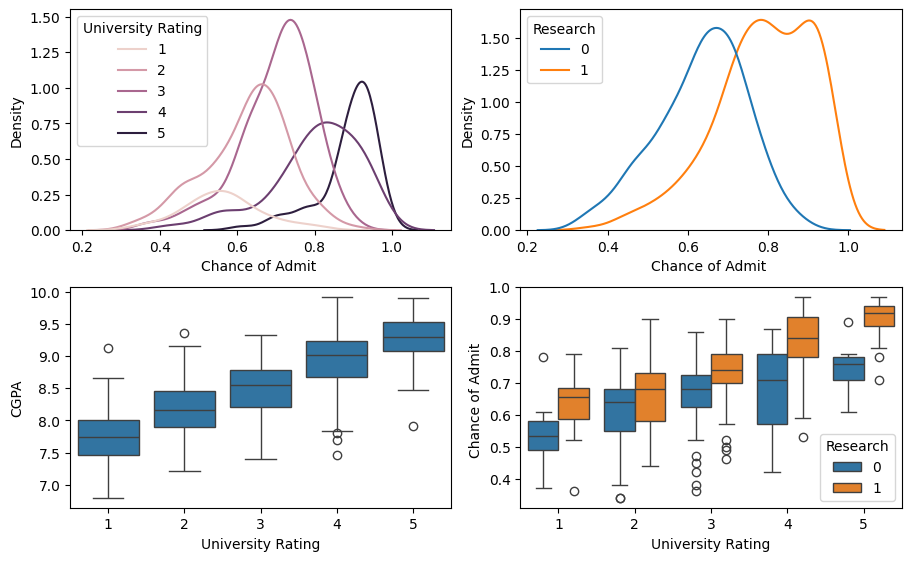

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(9, 5.5), constrained_layout=True)
sns.kdeplot(data=df, x = 'Chance of Admit ', hue = 'University Rating', ax = axes[0,0])
sns.kdeplot(data=df, x = 'Chance of Admit ', hue = 'Research', ax = axes[0,1])
sns.boxplot(data=df, x = 'University Rating', y = 'CGPA', ax = axes[1,0])
sns.boxplot(data=df, x = 'University Rating', y = 'Chance of Admit ', hue = 'Research', ax = axes[1,1])
plt.show

### **5.2.1 Insights-**

*Top Left: Chance of Admit Distribution by University Rating*
- Applicants from higher-rated universities (4 and 5) have their "Chance of Admit" distributed towards higher probabilities (closer to 1.0).
- On the contrary, lower-rated universities (1 and 2) see distributions skewed toward lower "Chance of Admit" values.
- This reinforces the positive relationship between University Rating and admission probability.

*Top Right: Chance of Admit Distribution by Research Experience*
- Applicants with research experience (orange curve, coded as 1) generally have higher chances of admission, with the peak density shifted toward higher probabilities compared to those without research experience (blue curve, coded as 0).
- This supports the conclusion that research experience contributes positively to the admission chances, though the effect is moderate.

*Bottom Left: CGPA by University Rating (Boxplot)*
- Higher university ratings correlate with higher CGPA values.
- The median CGPA increases as university ratings go from 1 to 5, and the interquartile range (IQR) tends to shrink slightly at higher ratings, indicating more consistency in CGPA for higher-rated universities.

*Bottom Right: Chance of Admit by University Rating and Research Experience (Boxplot)*
- Applicants with research experience (orange boxes) consistently have higher median admission chances than those without (blue boxes), across all university ratings.
- The influence of research is more pronounced for applicants from higher-rated universities, with a clear separation between blue and orange boxes.
- For lower-rated universities (ratings 1 and 2), the chance of admit remains comparatively low, even with research experience.

*General Insights:*
- University Rating and CGPA are strong predictors of admission probability, with higher values in these metrics leading to higher chances.
- Research Experience provides a measurable boost to the chance of admit, but its impact is more significant for higher-rated universities.
- The distributions indicate that the chance of admission becomes increasingly competitive as university ratings improve, particularly for applicants with strong academic records and research experience.

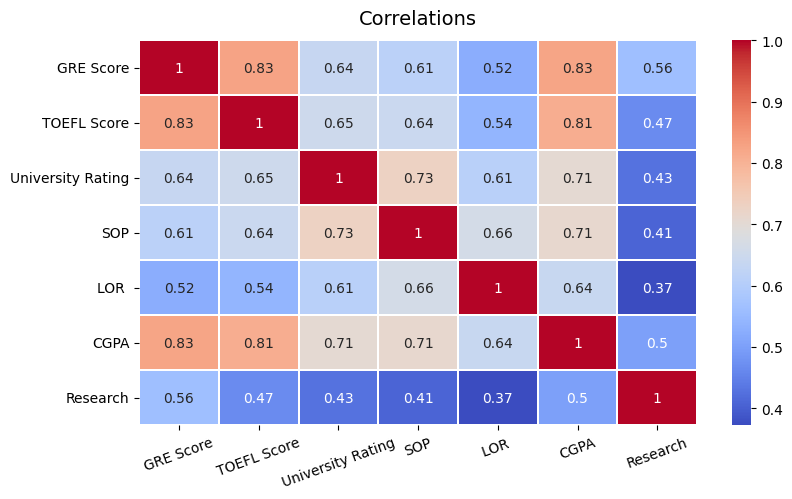

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000


In [ ]:
plt.figure(figsize=(9,5))
sns.heatmap(df[bivariate].corr(), annot = True, cmap = 'coolwarm', linewidths = 0.1)
plt.title(f'Correlations',fontsize=14, y =1.02)
plt.xticks(rotation=20)
plt.yticks(rotation=0)
plt.show()

df[bivariate].corr()

**Insights-**

*GRE Score and TOEFL Score:*
- These have a strong positive correlation (0.83), which makes sense as they both measure English language proficiency.
- University Rating and SOP/LOR: These have moderate positive correlations, suggesting that higher-ranked universities tend to have applicants with stronger application materials.

*CGPA and GRE/TOEFL Score:*
- These have strong positive correlations, indicating that students with higher GPAs tend to also score well on standardized tests.

*Research Experience:*
- This has lower correlations with other variables, suggesting it might be less influential in the admissions process compared to factors like CGPA and standardized test scores.

*General Insights:*
- The heatmap suggests that a strong academic record (high CGPA, good standardized test scores) is a significant predictor of admission to top universities.
- While research experience and strong application materials (SOP, LOR) are also important, their influence might be less pronounced than academic performance.

In [ ]:
df = df.drop('Serial No.', axis = 1)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


## 5.3 Detecting Outliers

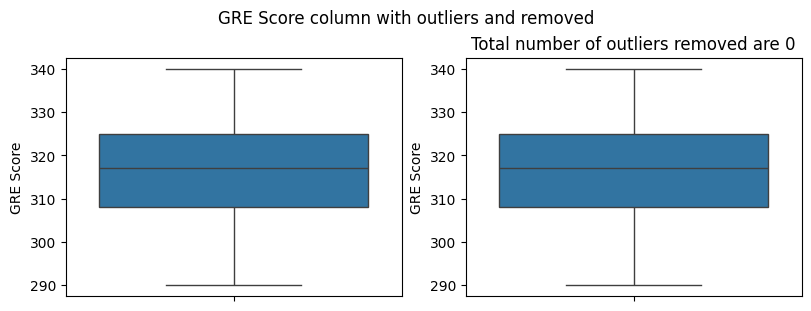

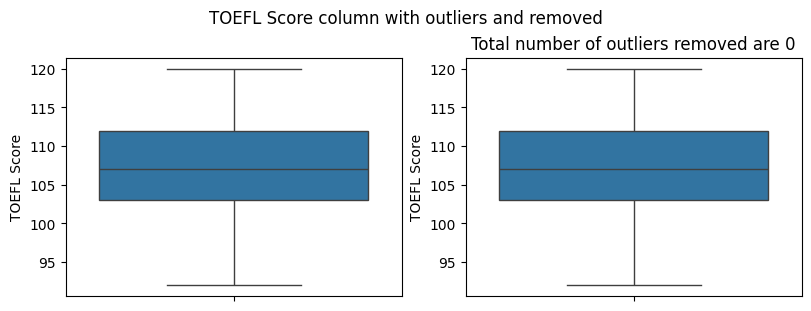

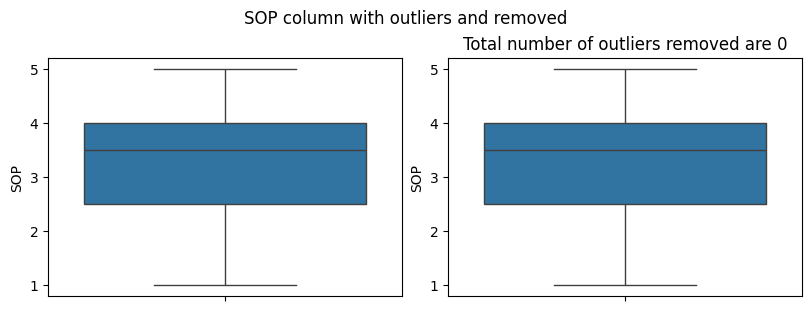

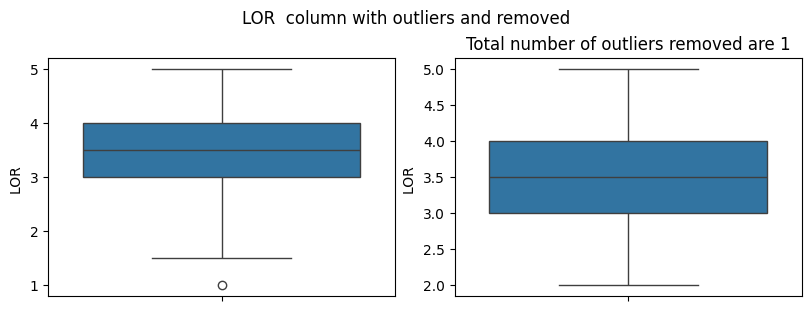

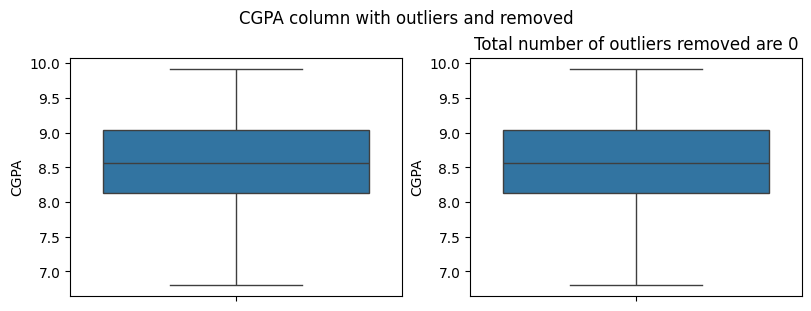

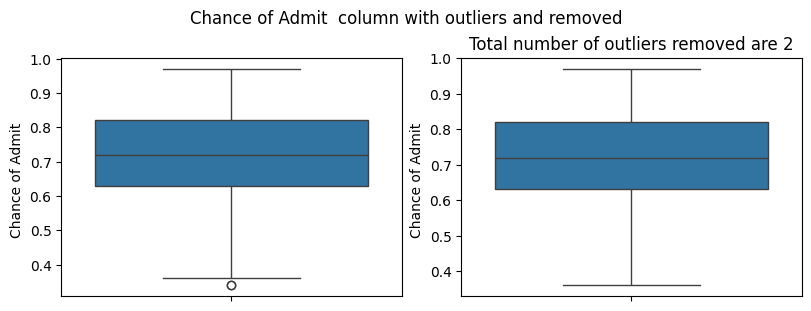

In [ ]:
def det_outliers():
  for i in numerical:
    fig, axes = plt.subplots(1, 2, figsize = (8, 3), constrained_layout = True)
    sns.boxplot(data = df[i], ax = axes[0])

    # Calculating the Quantiles
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)

    # Calculating the IQR
    IQR = Q3 - Q1

    # Setting the lower and upper limit to seperate the outlers
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    # Calculating the Total Outliers
    tot_out = len(df[df[i]<lower_limit]) + len(df[df[i]>upper_limit])

    # Trimming the Outliers
    # out_trim = df[i].between(lower_limit, upper_limit)
    out_trim = df[(df[i] > lower_limit) & (df[i] < upper_limit)]

    # Boxplot with outliers trimmed
    sns.boxplot(data = out_trim[i], ax = axes[1])
    plt.suptitle(f"{i} column with outliers and removed")
    plt.title(f'Total number of outliers removed are {tot_out}')
det_outliers()


*General Insight*

- It is clear that the dataset is clean witth less to zero ouliers.

# 6.0 Data Preprocessing

## 6.1 Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x = df.drop('Chance of Admit ', axis = 1)
y = df['Chance of Admit ']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
249,321,111,3,3.5,4.0,8.83,1
433,316,111,4,4.0,5.0,8.54,0
19,303,102,3,3.5,3.0,8.50,0
322,314,107,2,2.5,4.0,8.27,0
332,308,106,3,3.5,2.5,8.21,1
...,...,...,...,...,...,...,...
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0
435,309,105,2,2.5,4.0,7.68,0


In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((400, 7), (100, 7), (400,), (100,))

## 6.2 Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
x_train_columns = x_train.columns
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(data = x_train_scaled, columns = x_train_columns)
x_test = pd.DataFrame(data = scaler.transform(x_test), columns = x_train_columns)
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.389986,0.602418,-0.098298,0.126796,0.564984,0.415018,0.895434
1,-0.066405,0.602418,0.775459,0.633979,1.651491,-0.067852,-1.116777
2,-1.253022,-0.876917,-0.098298,0.126796,-0.521524,-0.134454,-1.116777
3,-0.248961,-0.055064,-0.972054,-0.887570,0.564984,-0.517420,-1.116777
4,-0.796631,-0.219435,-0.098298,0.126796,-1.064777,-0.617324,0.895434
...,...,...,...,...,...,...,...
395,1.120212,0.602418,0.775459,1.141162,1.108237,0.997792,0.895434
396,-0.979187,-0.383805,-0.972054,-0.887570,-0.521524,-0.600673,0.895434
397,-1.344300,-1.370029,-1.845810,-1.394754,-1.608031,-2.215790,-1.116777
398,-0.705353,-0.383805,-0.972054,-0.887570,0.564984,-1.499810,-1.116777


# 7.0 Training the Linear Regression Model

## 7.1 Linear Regression  using Scikit Learn Library

In [ ]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error

model = LinearRegression()
lasso_model = Lasso(alpha=0.01)  # Alpha is the regularization strength
ridge_model = Ridge(alpha=1.0)    # Alpha is the regularization strength


# Fit the models to the training data
model.fit(x_train, y_train)
lasso_model.fit(x_train, y_train)
ridge_model.fit(x_train, y_train)

predictions = model.predict(x_test)
lasso_predictions = lasso_model.predict(x_test)
ridge_predictions = ridge_model.predict(x_test)

print('test RSME:', np.sqrt(mean_squared_error(y_test, predictions)))
print('test MSE:', mean_squared_error(y_test, predictions))
print('test MAE:', mean_absolute_error(y_test, predictions))
print('test R2:', r2_score(y_test, predictions))
print("\n")

print('test RSME for L1:', np.sqrt(mean_squared_error(y_test, lasso_predictions)))
print('test MSE for L1:', mean_squared_error(y_test, lasso_predictions))
print('test MAE for L1:', mean_absolute_error(y_test, lasso_predictions))
print('test R2 for L1:', r2_score(y_test, lasso_predictions))
print("\n")

print('test RSME for L1:', np.sqrt(mean_squared_error(y_test, ridge_predictions)))
print('test MSE for L2:', mean_squared_error(y_test, ridge_predictions))
print('test MAE for L2:', mean_absolute_error(y_test, ridge_predictions))
print('test R2 for L2:', r2_score(y_test, ridge_predictions))

test RSME: 0.06086588041578314
test MSE: 0.0037046553987884136
test MAE: 0.0427226542770537
test R2: 0.8188432567829627


test RSME for L1: 0.06167490656830304
test MSE for L1: 0.0038037941002089094
test MAE for L1: 0.04270927740179335
test R2 for L1: 0.8139953985227918


test RSME for L1: 0.06087507177653933
test MSE for L2: 0.003705774363798815
test MAE for L2: 0.04274719474628152
test R2 for L2: 0.8187885396675396


### *7.1.1 General Insights*

- All three models exhibit good performance on the test data.
- Linear Regression appears to have a slight edge in terms of R2 score.
- Lasso and Ridge provide regularization benefits that can help to improve model robustness and prevent overfitting, especially when dealing with high-dimensional data or when there is a risk of collinearity among features.

## 7.2 Linear Regression using Statsmodels Library

### 7.2.1 First Iteration

In [ ]:
# Statsnodels implementation of Linear Regression

import statsmodels.api as sm

x_train_constant = sm.add_constant(x_train)
model = sm.OLS(y_train.values, x_train_constant).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Thu, 12 Dec 2024   Prob (F-statistic):          3.41e-142
Time:                        02:22:15   Log-Likelihood:                 561.91
No. Observations:                 400   AIC:                            -1108.
Df Residuals:                     392   BIC:                            -1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7242      0.00

#### **Insights**

- A higher R-squared means your model does a better job of capturing the patterns in the data.
- An R-squared of 0.821 means that 82.1% of the variability in the target variable is explained by the independent variables.
- GRE Score, TOEFL Score, Letter of Recommendation (LOR), CGPA, and Research experience are under the P_value threshold.
- Whereas having a statistically significant positive relationships with the dependent variable. This suggests that these factors are important determinants of the outcome.

*Recommended Further Action*

- University Rating and Statement of Purpose (SOP) were found to be statistically insignificant in this model.
- Also the coefficients for these variables are not significantly different from zero, indicating that they may not have a meaningful impact on the dependent variable in this model.
- Therefore dropping the "SOP" column for the next iteration of Linear Regression and analyse further.  

### 7.2.2 Second Iteration

In [ ]:
x_train1 = x_train.drop(columns = 'SOP')

x_train1_constant = sm.add_constant(x_train1)
model1 = sm.OLS(y_train.values, x_train1_constant).fit()
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     300.4
Date:                Thu, 12 Dec 2024   Prob (F-statistic):          2.01e-143
Time:                        02:22:15   Log-Likelihood:                 561.85
No. Observations:                 400   AIC:                            -1110.
Df Residuals:                     393   BIC:                            -1082.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7242      0.00

#### **Insights**

- Almost same results in terms of p_value, coefficient and other metrics.

*Recommended Further Action*
- Dropping the "University Rating" Column until wwe have all the independent variable under the recommended P-value Threshold.

### 7.2.3 Third Iteration

In [ ]:
x_train2 = x_train1.drop(columns = 'University Rating')

x_train2_constant = sm.add_constant(x_train2)
model2 = sm.OLS(y_train.values, x_train2_constant).fit()
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     360.8
Date:                Thu, 12 Dec 2024   Prob (F-statistic):          1.36e-144
Time:                        02:22:15   Log-Likelihood:                 561.54
No. Observations:                 400   AIC:                            -1111.
Df Residuals:                     394   BIC:                            -1087.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7242      0.003    241.830      

#### **Insights**

- All values are under the recommended threshold with a positive indication that the model is capable of learning the underlying patterns to make predictions and so we can go ahead and test the assumptions if the Linear Regression model.

# 8.0 Assumptions of Linear Regression

## 8.1 Multicollinearity Test

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Variable'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Variable,VIF
5,CGPA,4.654540
0,GRE Score,4.489983
1,TOEFL Score,3.664298
3,SOP,2.785764
2,University Rating,2.572110
4,LOR,1.977698
6,Research,1.518065


### **Insights**

- Before removing the statistically insignificant predictors (University Rating and SOP), an assessment of multicollinearity was conducted using Variance Inflation Factors (VIF).
- All VIF scores were found to be within acceptable limits, indicating a low level of multicollinearity among the independent variables in the initial model.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Variable'] = x_train2.columns
vif['VIF'] = [variance_inflation_factor(x_train2.values, i) for i in range(x_train2.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Variable,VIF
0,GRE Score,4.471557
3,CGPA,4.281365
1,TOEFL Score,3.540082
2,LOR,1.655867
4,Research,1.504670


### **Insights**

- Following the removal of statistically insignificant predictors (University Rating and SOP), a reassessment of multicollinearity was conducted.
- The VIF scores of the remaining independent variables continued to remain within acceptable limits, further confirming the absence of significant multicollinearity issues in the final model.

**Going ahead with the predictions as the VIF scores are within the intended threshold.**

In [ ]:
x_test = x_test.drop(columns = 'SOP')
x_test = x_test.drop(columns = 'University Rating')
x_test

,GRE Score,TOEFL Score,LOR,CGPA,Research
0,1.576604,1.424271,0.021730,1.597217,0.895434
1,-0.248961,0.109306,0.564984,0.764683,0.895434
2,-0.157683,-0.383805,-1.064777,-1.549762,-1.116777
3,-0.431518,0.273677,-0.521524,0.181909,-1.116777
4,0.846378,0.766789,-0.521524,0.781333,0.895434
...,...,...,...,...,...
95,-1.618135,-2.191882,-2.694538,-2.065934,-1.116777
96,-0.157683,-0.219435,0.021730,-0.267660,-1.116777
97,1.120212,1.095530,0.564984,-0.034550,0.895434
98,0.116152,0.438048,0.021730,-0.067852,0.895434


In [ ]:
x_test = sm.add_constant(x_test)
pred  = model2.predict(x_test)

print('Mean Absolute Error', mean_absolute_error(y_test, pred))
print('Mean Squared Error', mean_squared_error(y_test, pred))
print('Root Mean Squared Error', np.sqrt(mean_squared_error(y_test, pred)))
print('R2 Score', r2_score(y_test, pred))
print('Adjusted R2 Score', 1 - (1-r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

Mean Absolute Error 0.042923455782657785
Mean Squared Error 0.003773020765116895
Root Mean Squared Error 0.06142491974041883
R2 Score 0.8155002070847485
Adjusted R2 Score 0.8035969946386032


## Mean of Residuals

In [ ]:
residuals = y_test.values - pred
residuals.mean()

-0.005305947942349201

### **Insights**

- The mean residual value of -0.005305947942349201 is very close to zero. This suggests that the model's predictions are, on average, quite accurate, with minimal systematic bias.

## 8.2 Normality of Residuals

### 8.2.1 Normality Check using Histplot

<Axes: ylabel='Count'>

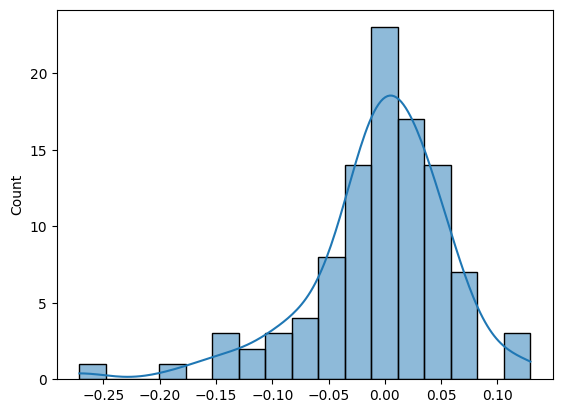

In [ ]:
sns.histplot(residuals, kde = True)

#### **Insights**

- *Slight Skewness:* The distribution seems to have a slight rightward skew, meaning there are a few larger positive residuals compared to the negative ones.
- *Potential Outliers:* There might be a few potential outliers on the distribution.

### 8.2.2 Linearity check using Scatterplot between Predicted value and Residuals

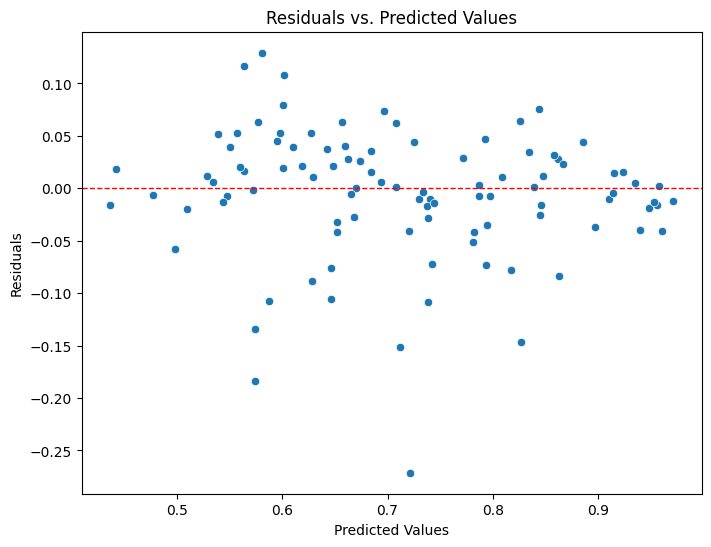

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()


### 8.2.3 Normality Check using QQ plot

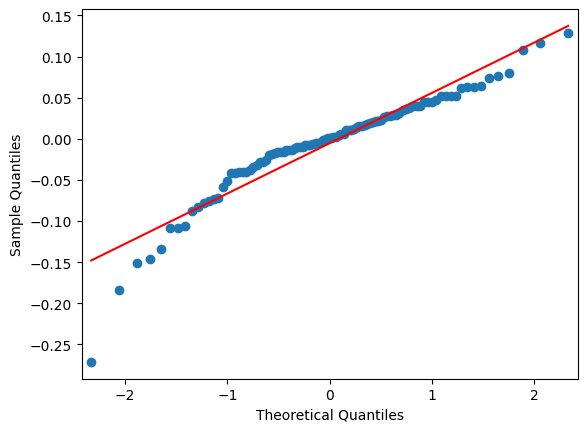

In [ ]:
qqplot = sm.qqplot(residuals, line = 's')

#### **Insights**

- The QQ plot suggest that there is a slight deviation in the normality of the residual with strong central distribution around the straight line while fewer deviations in the tails. Suggesting outliers.
- This suggests that the distribution of the residuals might have heavier tails than a normal distribution.


## 8.3 Test for Homoscedasticity and Linearity

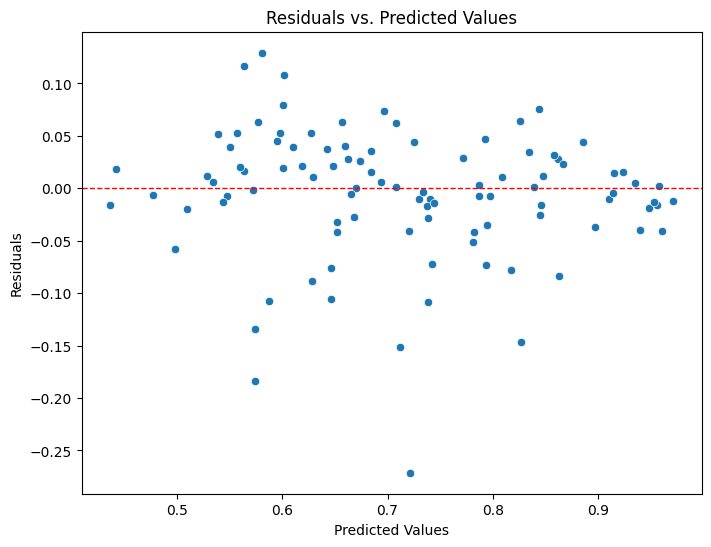

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()

### **Insights**

- *Linearity Assumption is met:*
    - The points seem to be randomly scattered around the horizontal line. There isn't a strong indication of any non-linear patterns. This provides visual support for the linearity assumption.
- *Homoscedasticity Assumption is met:*
    - The plot appears to show relatively constant variance in the residuals across the range of predicted values.
    - There is no clear funnel shape or any other systematic pattern in the spread of points. This suggests that the homoscedasticity assumption is likely met.

### 8.3.1 Goldfeld-Quandt test to check for Homoscedasticity.

In [ ]:
# Performing the Goldfeld-Quandt test to check for Homoscedasticity -
# H0: The is not heteroskedistic
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_train, x_train_constant)
lzip(name, test)


[('F statistic', 0.9506884043302335), ('p-value', 0.6367845922442998)]

#### **Insights**

- The test suggests that the variances of the residuals are likely to be equal across the range of predicted values.
- This supports the visual observation from the Residuals vs. Predicted Values plot that the residuals appear to be evenly spread.
- Hence No Heteroskedasticity.

## 8.4 AutoCorrelation

### 8.4.1 Residual Plot and Pattern Continuity

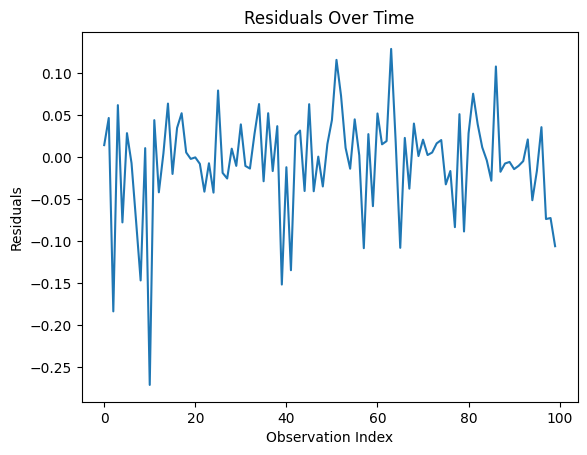

In [ ]:
plt.plot(residuals)
plt.title("Residuals Over Time")
plt.xlabel("Observation Index")
plt.ylabel("Residuals")
plt.show()

### 8.4.2 Durbin Watson test for Autocorrelation

In [ ]:
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(residuals)
print("Durbin-Watson Statistic:", dw_stat)


Durbin-Watson Statistic: 2.213874488273333


#### **Insights**
- The residuals appear to be randomly scattered around the horizontal line at zero. There is no discernible pattern or trend suggesting a relationship between residuals at different time points.
- The value of 2.213874488273333 is close to 2, which suggests that there is no significant evidence of first-order autocorrelation in the residuals.

*Conclusion:*
    - No Autocorrelation assumtion is also met.


# **9.0 Actionable Insights & Recommendations**
**Key Insights:**

- CGPA, GRE Score, and TOEFL Score are the most crucial factors influencing admissions.
- SOP, LOR, and University Rating have a noticeable but less significant impact.
- Research Experience provides a measurable boost to the chance of admit, but its impact is more significant for higher-rated universities.
- The distributions indicate that the chance of admission becomes increasingly competitive as university ratings improve, particularly for applicants with strong academic records and research experience.
- All models (Linear Regression, Lasso, Ridge) perform well, with Linear Regression slightly edging out Lasso and Ridge in terms of R-squared.
- The non-normality of residuals, can affect the reliability of statistical inferences, Therefore, non-linear models or robust regression models that are less sensitive to deviation from normality can be employed.

**Recommendations:**

- More features needed to be added especially for the Universities that are rated high. As the university attracts student that are highly competitive, it is highly essential that more features needed to be added to provide a better prediction.
- As the empirical data suggests that the Research column had very less significant impact on the target variable in the low rated Universities but prevailed as deciding aspect in the high rated universities which can be seen in the Bivariate analysis module.
- Hypothesis testing can be done on the significance of having a strong college essay or successful sports career and do sentiment analysis on the essay to understand the university’s inclinations and likeness.
- Data can be gathered from alumni of competitive university.
- If available, analyse trends in application patterns, acceptance rates, and student outcomes over time.
- The generic rating of universities wouldn’t suffice, reputable ranking like QS World rankings etc should be incorporated, instead of categorizing them into 5 groups.
- Continuously monitor model performance and retrain it periodically and regularly evaluate and update features based on new insights and data. Also implement bias detection and mitigation strategies.

In [ ]:
def colab2pdf():

  # @title Download Notebook in PDF Format{display-mode:'form'}

  !apt-get install -yqq --no-install-recommends librsvg2-bin>/dev/null;

  import contextlib,datetime,google,io,IPython,ipywidgets,json,locale,nbformat,os,pathlib,requests,urllib,warnings,werkzeug,yaml,re;locale.setlocale(locale.LC_ALL,'en_US.UTF-8');warnings.filterwarnings('ignore',category=nbformat.validator.MissingIDFieldWarning);

  %matplotlib inline

  def convert(b):

    try:

      s.value='🔄 Converting';b.disabled=True

      n=pathlib.Path(werkzeug.utils.secure_filename(urllib.parse.unquote(requests.get(f'http://{os.environ["COLAB_JUPYTER_IP"]}:{os.environ["KMP_TARGET_PORT"]}/api/sessions').json()[0]['name'])))

      p=pathlib.Path('/content/pdfs')/f'{datetime.datetime.utcnow().strftime("%Y%m%d_%H%M%S")}_{n.stem}';p.mkdir(parents=True,exist_ok=True);nb=nbformat.reads(json.dumps(google.colab._message.blocking_request('get_ipynb',timeout_sec=600)['ipynb']),as_version=4)

      u=[u for c in nb.cells if c.get('cell_type')=='markdown' for u in re.findall(r'!\[.*?\]\((https?://.*?)\)',c['source']) if requests.head(u,timeout=5).status_code!=200]

      if u:raise Exception(f"Bad Image URLs: {','.join(u)}")

      nb.cells=[cell for cell in nb.cells if '--Colab2PDF' not in cell.source]

      nb=nbformat.v4.new_notebook(cells=nb.cells or [nbformat.v4.new_code_cell('#')]);nbformat.validator.normalize(nb)

      nbformat.write(nb,(p/f'{n.stem}.ipynb').open('w',encoding='utf-8'))

      with (p/'config.yml').open('w', encoding='utf-8') as f: yaml.dump({'include-in-header':[{'text':r'\usepackage{fvextra}\DefineVerbatimEnvironment{Highlighting}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines,breakanywhere,commandchars=\\\{\}}'}],'include-before-body':[{'text':r'\DefineVerbatimEnvironment{verbatim}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines}'}]},f)

      !quarto render {p}/{n.stem}.ipynb --metadata-file={p}/config.yml --to pdf -M latex-auto-install -M margin-top=1in -M margin-bottom=1in -M margin-left=1in -M margin-right=1in --quiet

      google.colab.files.download(str(p/f'{n.stem}.pdf'));s.value=f'✅ Downloaded: {n.stem}.pdf'

    except Exception as e:s.value=f'❌ {str(e)}'

    finally:b.disabled=False

  if not pathlib.Path('/usr/local/bin/quarto').exists():

    !wget -q 'https://quarto.org/download/latest/quarto-linux-amd64.deb' && dpkg -i quarto-linux-amd64.deb>/dev/null && quarto install tinytex --update-path --quiet && rm quarto-linux-amd64.deb

  b=ipywidgets.widgets.Button(description='⬇️ Download');s=ipywidgets.widgets.Label();b.on_click(lambda b:convert(b));IPython.display.display(ipywidgets.widgets.HBox([b,s]))

colab2pdf() # | Colab2PDF v1.6 | https://github.com/drengskapur/colab2pdf | GPL-3.0-or-later |

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>